# Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
df = pd.read_csv("df_test_rank.csv")
SPY = pd.read_csv("SPY_Test.csv")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
df.head(3)

,Date,PERMNO,TICKER,Price,Return,Shares Outstanding,Beta,Alpha,SPY Return,Rf,Turnover Rank,Dollar Turnover Rank,Current Ratio Rank,Cash Ratio Rank,Quick Ratio Rank,Revenue Growth Rank,COGS Growth Rank,Operating Income Growth Rank,Net Income Growth Rank,Net Operating Cash Flow Growth Rank
0,2015-01-01,10025,AEPI,50.11,-0.138263,5.083,0.971110,-0.108187,-0.031,0.000989,8,5,7,10,8,5,5,8,9,2
1,2015-01-01,10026,JJSF,98.12,-0.097913,18.678,0.849687,-0.071721,-0.031,0.000989,8,3,4,5,5,7,7,7,6,5
2,2015-01-01,10032,PLXS,37.89,-0.080563,33.548,1.830547,-0.022995,-0.031,0.000989,6,4,5,7,7,3,3,5,4,5


In [4]:
df.describe()

,PERMNO,Price,Return,Shares Outstanding,Beta,Alpha,SPY Return,Rf,Turnover Rank,Dollar Turnover Rank,Current Ratio Rank,Cash Ratio Rank,Quick Ratio Rank,Revenue Growth Rank,COGS Growth Rank,Operating Income Growth Rank,Net Income Growth Rank,Net Operating Cash Flow Growth Rank
count,237454.000000,237454.000000,237454.000000,237454.000000,237454.000000,237454.000000,237454.000000,237454.000000,237454.000000,237454.000000,237454.000000,237454.000000,237454.000000,237454.000000,237454.000000,237454.000000,237454.000000,237454.000000
mean,60333.521120,46.414323,0.019615,127.576886,1.103154,0.008639,0.009407,0.001628,5.498766,5.498766,5.498732,5.498783,5.498741,5.498665,5.498825,5.499688,5.498943,5.499023
std,32856.630642,88.350818,0.161399,436.317797,1.297084,0.152754,0.033141,0.000461,2.872360,2.872252,2.872264,2.872179,2.872258,2.872173,2.872308,2.872050,2.872299,2.872428
min,10025.000000,5.000000,-0.983861,0.484000,-18.415114,-2.065562,-0.091800,0.000843,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15579.000000,12.110000,-0.050766,19.834000,0.475060,-0.056822,-0.000400,0.001269,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,79007.000000,25.520000,0.009094,40.084000,1.040906,-0.000223,0.015300,0.001567,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,88195.000000,52.770000,0.074658,84.834000,1.641042,0.058708,0.029700,0.002091,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,93436.000000,2178.000000,8.903865,8218.000000,37.117313,8.880325,0.083000,0.002489,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
# Transform Date into datetime type
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [6]:
# Construct Date List
Date = []
for i in range(2015, 2020):
    for j in range(1, 13):
        date = str(i) + '-' + str(j)
        Date.append(date)
        
#Date = Date[1:]
# for i in range(1,12):
#     Date.remove("1999-" + str(i))

In [7]:
Factor_List = ['Turnover', 'Dollar Turnover', 'Current Ratio', 'Cash Ratio', 'Quick Ratio',
 'Revenue Growth', 'COGS Growth', 'Operating Income Growth', 'Net Income Growth',
 'Net Operating Cash Flow Growth']

Factor_Rank = ['Turnover Rank', 'Dollar Turnover Rank', 'Current Ratio Rank',
 'Cash Ratio Rank', 'Quick Ratio Rank', 'Revenue Growth Rank',
 'COGS Growth Rank', 'Operating Income Growth Rank', 'Net Income Growth Rank',
 'Net Operating Cash Flow Growth Rank']

# Select Stocks based on Rank

In [8]:
class Solve():
    def __init__(self, df, SPY, Date):
        self.df = df
        self.Date = Date
        self.SPY = SPY
        #self.Factor_Rank = Factor_Rank
        
    def Combine_Factors(self):
        self.df['Liquid Ratio Rank'] = (self.df['Cash Ratio Rank'] + self.df['Current Ratio Rank'] + self.df['Quick Ratio Rank']) / 3 
        self.df['Turnover Combine Rank'] = (self.df['Turnover Rank'] + self.df['Dollar Turnover Rank']) / 2
        self.df['Liquidity Combine Rank'] = (self.df['Liquid Ratio Rank'] + self.df['Turnover Combine Rank']) / 2
        self.df['Growth Combine Rank'] = (self.df['Net Operating Cash Flow Growth Rank'] + 
                                            self.df['Revenue Growth Rank'] + self.df['COGS Growth Rank'] + 
                                            self.df['Operating Income Growth Rank'] + self.df['Net Income Growth Rank']) / 5
        
        self.df['Total Rank'] = (self.df['Liquidity Combine Rank'] + self.df['Growth Combine Rank']) / 2 
                              
    def Get_Returns(self, Factor_Rank):
        self.df_ = self.df.copy()
#         self.df_.dropna(subset=['Alpha'], inplace=True)
#         self.df_.reset_index(inplace=True)
        self.Returns1 = {} # Used to store TOP each factor's return for each month
        self.Returns2 = {} # Used to store BOT each factor's return for each month
        self.Excesses1 = {} # Used to store TOP each factor's excess return for each month
        self.Excesses2 = {} # Used to store BOT each factor's excess return for each month
        self.Diffs = {} # Used to store each factor's diff return for each month
        self.Diffs_Excess = {} # Used to store each factor's diff excess return for each month
        
        self.Alpha1 = {}  # TOP Alpha
        self.Alpha2 = {}  # BOT Alpha
        self.Alpha3 = {}  # DIF Alpha
        
        
        for factor in Factor_Rank:
            Return1 = []  # Used to store TOP return for each month
            Return2 = []  # Used to store BOT return for each month
            Excess1 = []  # Used to store TOP excess return for each month
            Excess2 = []  # Used to store BOT excess return for each month
            Diff = []    # Used to store return of difference between TOP and BOT for each month
            Diff_Excess = []    # Used to store excess return of difference between TOP and BOT for each month
            
            Alpha1 = []  # TOP Alpha
            Alpha2 = []  # BOT Alpha
            Alpha3 = []  # DIF Alpha
            
            for date in Date:
                DF = self.df_[date].copy()  # Divide the big df into small DF by date
                N = int(len(DF)/10)   # We decide to long top 10% of universe and short bottom 10%
                DF = DF.sort_values(by = [factor], axis = 0, ascending = True)  # Sort by Turnover
                #profit = ( DF.iloc[:N]['Return'].mean() - DF.iloc[-N:]['Return'].mean() ) / 2 
                profit1 = DF.iloc[:N]['Return'].mean()
                profit2 = DF.iloc[-N:]['Return'].mean()
                profit_SPY = DF.iloc[:N]['SPY Return'].mean()
                diff = profit1 - profit2
                
                alpha1 = DF.iloc[:N]['Alpha'].mean()
                alpha2 = DF.iloc[-N:]['Alpha'].mean()
                alpha3 = alpha1 - alpha2

                Return1.append( profit1 )
                Return2.append( profit2 )
                Excess1.append( profit1 - profit_SPY )
                Excess2.append( profit2 - profit_SPY )
                Diff.append( diff )
                Diff_Excess.append( diff - profit_SPY )
                
                Alpha1.append(alpha1)
                Alpha2.append(alpha2)
                Alpha3.append(alpha3)

            self.Returns1[factor] = Return1 
            self.Returns2[factor] = Return2 
            self.Excesses1[factor] = Excess1
            self.Excesses2[factor] = Excess2
            self.Diffs[factor] = Diff
            self.Diffs_Excess[factor] = Diff_Excess
            
            self.Alpha1[factor] = Alpha1
            self.Alpha2[factor] = Alpha2
            self.Alpha3[factor] = Alpha3

    def Return_Summary(self):
        print("Summary for SPY Return:"); print(self.df['SPY Return'].describe())
        print("=============++++++++++++++=============")
        
        for key in self.Factor_Rank:
            print("=================" + key + "=================")
            print("Summary for TOP Return:"); print(pd.Series(self.Returns1[key]).describe(), "\n")
            print("Summary for BOT Return:"); print(pd.Series(self.Returns2[key]).describe(), "\n")
            print("Summary for Diff Return:"); print(pd.Series(self.Diffs[key]).describe(), "\n")
            print("Summary for TOP Excess Return:"); print(pd.Series(self.Excesses1[key]).describe(), "\n")
            print("Summary for BOT Excess Return:"); print(pd.Series(self.Excesses2[key]).describe(), "\n")
            print("Summary for Diff Excess Return:"); print(pd.Series(self.Diffs_Excess[key]).describe())
            print("=================++++++++++++++=================")
        
    def Show_DF_Return(self, Factor_Rank):
        from scipy import stats
        
        Factors = []
        TOP = [];  BOT = [];  DIF = []
        TOP_std = [];  BOT_std = [];  DIF_std = []
        t_TOP = []; t_BOT = []; t_DIF = []
        Alpha_TOP = []; Alpha_BOT = []; Alpha_DIF = []
        t_A_TOP = []; t_A_BOT = []; t_A_DIF = []
        
        for key in Factor_Rank:
            Factors.append(key[:-5])
            
            TOP.append(np.mean(self.Returns1[key]) * 100 )
            BOT.append(np.mean(self.Returns2[key]) * 100 )
            DIF.append(np.mean(self.Diffs[key]) * 100 )
            
            TOP_std.append(np.std(self.Returns1[key]) * 100 )
            BOT_std.append(np.std(self.Returns2[key]) * 100 )
            DIF_std.append(np.std(self.Diffs[key]) * 100 )
            
            t_TOP.append(stats.ttest_1samp(self.Returns1[key], 0)[0])
            t_BOT.append(stats.ttest_1samp(self.Returns2[key], 0)[0])
            t_DIF.append(stats.ttest_1samp(self.Diffs[key], 0)[0])
            
            Alpha_TOP.append(np.mean(self.Alpha1[key]) * 100 )
            Alpha_BOT.append(np.mean(self.Alpha2[key]) * 100 )
            Alpha_DIF.append(np.mean(self.Alpha3[key]) * 100 )
            
            t_A_TOP.append(stats.ttest_1samp(self.Alpha1[key], 0)[0])
            t_A_BOT.append(stats.ttest_1samp(self.Alpha2[key], 0)[0])
            t_A_DIF.append(stats.ttest_1samp(self.Alpha3[key], 0)[0])
            
        self.df_Return = pd.DataFrame({'Factor':Factors,
                                      'TOP%': TOP, 'BOT%': BOT, 'DIF%':DIF,
                                      't(TOP)':t_TOP, 't(BOT)':t_BOT, 't(DIF)':t_DIF,
                                      'Alpha TOP%': Alpha_TOP, 'Alpha BOT%': Alpha_BOT, 'Alpha DIF%': Alpha_DIF,
                                      't(Alpha TOP)':t_A_TOP, 't(Alpha BOT)':t_A_BOT, 't(Alpha DIF)':t_A_DIF,
                                      'TOP std':TOP_std, 'BOT std':BOT_std, 'DIF std':DIF_std})
        
    
    def Show_DF_Excess(self, Factor_Rank):
        from scipy import stats
        
        Factors = []
        TOP = [];  BOT = [];  DIF = []
        TOP_std = [];  BOT_std = [];  DIF_std = []
        t_TOP = []; t_BOT = []; t_DIF = []
        
        for key in Factor_Rank:
            Factors.append(key[:-5])
            
            TOP.append(np.mean(self.Excesses1[key]) * 100 )
            BOT.append(np.mean(self.Excesses2[key]) * 100 )
            DIF.append(np.mean(self.Diffs_Excess[key]) * 100 )
            
            TOP_std.append(np.std(self.Excesses1[key]) * 100 )
            BOT_std.append(np.std(self.Excesses2[key]) * 100 )
            DIF_std.append(np.std(self.Diffs_Excess[key]) * 100 )
            
            t_TOP.append(stats.ttest_1samp(self.Excesses1[key], 0)[0])
            t_BOT.append(stats.ttest_1samp(self.Excesses2[key], 0)[0])
            t_DIF.append(stats.ttest_1samp(self.Diffs_Excess[key], 0)[0])
            
            
        self.df_Excess = pd.DataFrame({'Factor':Factors,
                                      'TOP%': TOP, 'BOT%': BOT, 'DIF%':DIF,
                                      't(TOP)':t_TOP, 't(BOT)':t_BOT, 't(DIF)':t_DIF,
                                      'TOP std':TOP_std, 'BOT std':BOT_std, 'DIF std':DIF_std})   
    
    def Plot_Cum_TOP_Return(self, Factor_Rank):
        fig1 = plt.figure(figsize = (20, 10))
        ax1 = fig1.add_subplot(111)
        
        plt.plot(self.Date, (self.SPY['SPY Return'] + 1).cumprod()-1, label = 'SPY', color = 'black')
        
        for factor in Factor_Rank:
            plt.plot(self.Date, (pd.Series(self.Returns1[factor])+1).cumprod()-1, label = factor) 
            
        plt.tick_params(axis='x', which='major', labelsize=15)
        plt.tick_params(axis='y', which='major', labelsize=15)
        plt.xticks(np.arange(0, len(Date), step=12))
        plt.ylabel('Cumulative Return', fontsize = 15)
        locs, labels = plt.xticks() 
        plt.setp(labels, rotation = 90)
        plt.title('Cumulative Returns for each Factor (TOP)',fontsize =15)
        
        colormap = plt.cm.gist_ncar
        colors = [colormap(i) for i in np.linspace(0, 0.9, len(ax1.lines))]
        
        for i,j in enumerate(ax1.lines):
            j.set_color(colors[i])
        ax1.legend(loc=2)
        
    def Plot_Cum_TOP_Excess(self, Factor_Rank):

        fig1 = plt.figure(figsize = (20, 10))
        ax1 = fig1.add_subplot(111)
        
        for factor in Factor_Rank:
            plt.plot(self.Date, (pd.Series(self.Excesses1[factor])+1).cumprod()-1, label = factor) 
 
        plt.tick_params(axis='x', which='major', labelsize=15)
        plt.tick_params(axis='y', which='major', labelsize=15)
        plt.xticks(np.arange(0, len(Date), step=12))
        plt.ylabel('Cumulative Return', fontsize = 15)
        locs, labels = plt.xticks() 
        plt.setp(labels, rotation = 90)
        plt.title('Cumulative Excess Returns for each Factor (TOP)',fontsize =15)

        colormap = plt.cm.gist_ncar
        colors = [colormap(i) for i in np.linspace(0, 0.9, len(ax1.lines))]

        for i,j in enumerate(ax1.lines):
            j.set_color(colors[i])
        ax1.legend(loc=2)
        
    def Plot_Cum_BOT_Return(self, Factor_Rank):
        fig1 = plt.figure(figsize = (20, 10))
        ax1 = fig1.add_subplot(111)
        
        plt.plot(self.Date, (self.SPY['SPY Return'] + 1).cumprod()-1, label = 'SPY', color = 'black')
        
        for factor in Factor_Rank:
            plt.plot(self.Date, (pd.Series(self.Returns2[factor])+1).cumprod()-1, label = factor) 
            
        plt.tick_params(axis='x', which='major', labelsize=15)
        plt.tick_params(axis='y', which='major', labelsize=15)
        plt.xticks(np.arange(0, len(Date), step=12))
        plt.ylabel('Cumulative Return', fontsize = 15)
        locs, labels = plt.xticks() 
        plt.setp(labels, rotation = 90)
        plt.title('Cumulative Returns for each Factor (BOT)',fontsize =15)
        
        colormap = plt.cm.gist_ncar
        colors = [colormap(i) for i in np.linspace(0, 0.9, len(ax1.lines))]
        
        for i,j in enumerate(ax1.lines):
            j.set_color(colors[i])
        ax1.legend(loc=2)
        
    def Plot_Cum_BOT_Excess(self, Factor_Rank):
        fig1 = plt.figure(figsize = (20, 10))
        ax1 = fig1.add_subplot(111)
        
        for factor in Factor_Rank:
            plt.plot(self.Date, (pd.Series(self.Excesses2[factor])+1).cumprod()-1, label = factor) 
 
        plt.tick_params(axis='x', which='major', labelsize=15)
        plt.tick_params(axis='y', which='major', labelsize=15)
        plt.xticks(np.arange(0, len(Date), step=12))
        plt.ylabel('Cumulative Return', fontsize = 15)
        locs, labels = plt.xticks() 
        plt.setp(labels, rotation = 90)
        plt.title('Cumulative Excess Returns for each Factor (BOT)',fontsize =15)

        colormap = plt.cm.gist_ncar
        colors = [colormap(i) for i in np.linspace(0, 0.9, len(ax1.lines))]

        for i,j in enumerate(ax1.lines):
            j.set_color(colors[i])
        ax1.legend(loc=2)
        
    def Plot_Cum_Diff_Return(self, Factor_Rank):
        fig1 = plt.figure(figsize = (20, 10))
        ax1 = fig1.add_subplot(111)
        
        plt.plot(self.Date, (self.SPY['SPY Return'] + 1).cumprod()-1, label = 'SPY', color = 'black')
        
        for factor in Factor_Rank:
            plt.plot(self.Date, (pd.Series(self.Diffs[factor])+1).cumprod()-1, label = factor) 
            
        plt.tick_params(axis='x', which='major', labelsize=15)
        plt.tick_params(axis='y', which='major', labelsize=15)
        plt.xticks(np.arange(0, len(Date), step=12))
        plt.ylabel('Cumulative Return', fontsize = 15)
        locs, labels = plt.xticks() 
        plt.setp(labels, rotation = 90)
        plt.title('Cumulative Returns for each Factor (BOT)',fontsize =15)
        
        colormap = plt.cm.gist_ncar
        colors = [colormap(i) for i in np.linspace(0, 0.9, len(ax1.lines))]
        
        for i,j in enumerate(ax1.lines):
            j.set_color(colors[i])
        ax1.legend(loc=2)
        
    def Plot_Cum_Diff_Excess(self, Factor_Rank):
        fig1 = plt.figure(figsize = (20, 10))
        ax1 = fig1.add_subplot(111)
        
        for factor in Factor_Rank:
            plt.plot(self.Date, (pd.Series(self.Diffs_Excess[factor])+1).cumprod()-1, label = factor) 
            
        plt.tick_params(axis='x', which='major', labelsize=15)
        plt.tick_params(axis='y', which='major', labelsize=15)
        plt.xticks(np.arange(0, len(Date), step=12))
        plt.ylabel('Cumulative Return', fontsize = 15)
        locs, labels = plt.xticks() 
        plt.setp(labels, rotation = 90)
        plt.title('Cumulative Excess Returns for each Factor (BOT)',fontsize =15)
        
        colormap = plt.cm.gist_ncar
        colors = [colormap(i) for i in np.linspace(0, 0.9, len(ax1.lines))]
        
        for i,j in enumerate(ax1.lines):
            j.set_color(colors[i])
        ax1.legend(loc=2)

In [9]:
Object = Solve(df, SPY, Date)

## Calculate Returns and Excess Returns

In [10]:
Object.Get_Returns(Factor_Rank)

## Give a Summary for all Factors' Return and Excess

In [11]:
Object.Show_DF_Return(Factor_Rank)

In [12]:
Object.df_Return

,Factor,TOP%,BOT%,DIF%,t(TOP),t(BOT),t(DIF),Alpha TOP%,Alpha BOT%,Alpha DIF%,t(Alpha TOP),t(Alpha BOT),t(Alpha DIF),TOP std,BOT std,DIF std
0,Turnover,2.279864,2.286230,-0.006366,2.852757,4.894717,-0.011301,1.061707,1.502307,-0.440600,2.017397,4.568549,-0.888554,6.138612,3.587718,4.326452
1,Dollar Turnover,1.014003,4.104909,-3.090906,1.727831,8.116217,-7.549428,0.121555,3.126227,-3.004672,0.418515,8.634173,-8.255171,4.507794,3.884865,3.144834
2,Current Ratio,2.201670,1.927670,0.274000,2.713177,3.494166,0.507500,1.021089,1.130895,-0.109807,1.925742,3.340132,-0.218041,6.233042,4.237553,4.147061
3,Cash Ratio,2.851343,1.419759,1.431584,3.026879,2.549479,2.088822,1.618428,0.573573,1.044855,2.356416,1.567557,1.613736,7.235697,4.277491,5.264310
4,Quick Ratio,2.433877,1.544502,0.889375,2.854591,2.857682,1.429857,1.215669,0.795597,0.420072,2.108580,2.137871,0.724073,6.549087,4.151458,4.777692
5,Revenue Growth,2.791808,2.097521,0.694286,3.493920,2.850000,2.047718,1.651189,1.051348,0.599841,3.178031,2.436712,1.865778,6.137599,5.653112,2.604319
6,COGS Growth,2.227888,2.217120,0.010768,3.214019,3.167192,0.029844,1.268626,1.191783,0.076843,3.119272,2.720538,0.226703,5.324402,5.377010,2.771367
7,Operating Income Growth,2.220301,2.155831,0.064470,3.650043,3.239864,0.209821,1.313370,1.159977,0.153394,3.478349,2.803222,0.496191,4.672400,5.111096,2.360121
8,Net Income Growth,1.901458,2.237086,-0.335627,3.134105,3.464275,-1.047654,1.040416,1.161605,-0.121188,3.030396,3.042750,-0.386002,4.660143,4.960167,2.460739
9,Net Operating Cash Flow Growth,1.699548,1.917597,-0.218049,2.767233,3.201840,-0.715574,0.729232,1.024330,-0.295099,2.190271,2.779429,-0.972170,4.717519,4.600274,2.340594


In [13]:
Object.Show_DF_Excess(Factor_Rank)

In [14]:
Object.df_Excess

,Factor,TOP%,BOT%,DIF%,t(TOP),t(BOT),t(DIF),TOP std,BOT std,DIF std
0,Turnover,1.467031,1.473397,-0.819199,2.663249,4.158674,-1.563712,4.231103,2.721390,4.024004
1,Dollar Turnover,0.201170,3.292076,-3.903739,0.658799,8.725609,-8.144707,2.345504,2.898012,3.681555
2,Current Ratio,1.388837,1.114837,-0.538833,2.457692,3.219119,-0.928786,4.340599,2.660114,4.456202
3,Cash Ratio,2.038510,0.606925,0.618751,2.817341,1.657585,0.891481,5.557755,2.812454,5.331257
4,Quick Ratio,1.621044,0.731669,0.076542,2.654882,1.928202,0.124055,4.690029,2.914662,4.739251
5,Revenue Growth,1.978974,1.284688,-0.118547,3.635024,2.749288,-0.217898,4.181757,3.589248,4.178924
6,COGS Growth,1.415054,1.404287,-0.802066,3.292748,3.084811,-1.424590,3.300963,3.496659,4.324600
7,Operating Income Growth,1.407468,1.342998,-0.748363,3.731949,3.231053,-1.290214,2.896869,3.192694,4.455299
8,Net Income Growth,1.088625,1.424252,-1.148461,3.079649,3.652354,-2.016844,2.715208,2.995298,4.373909
9,Net Operating Cash Flow Growth,0.886714,1.104764,-1.030883,2.657099,2.984578,-2.067978,2.563315,2.843233,3.829034


## Plot Cumulative Return for each Factor

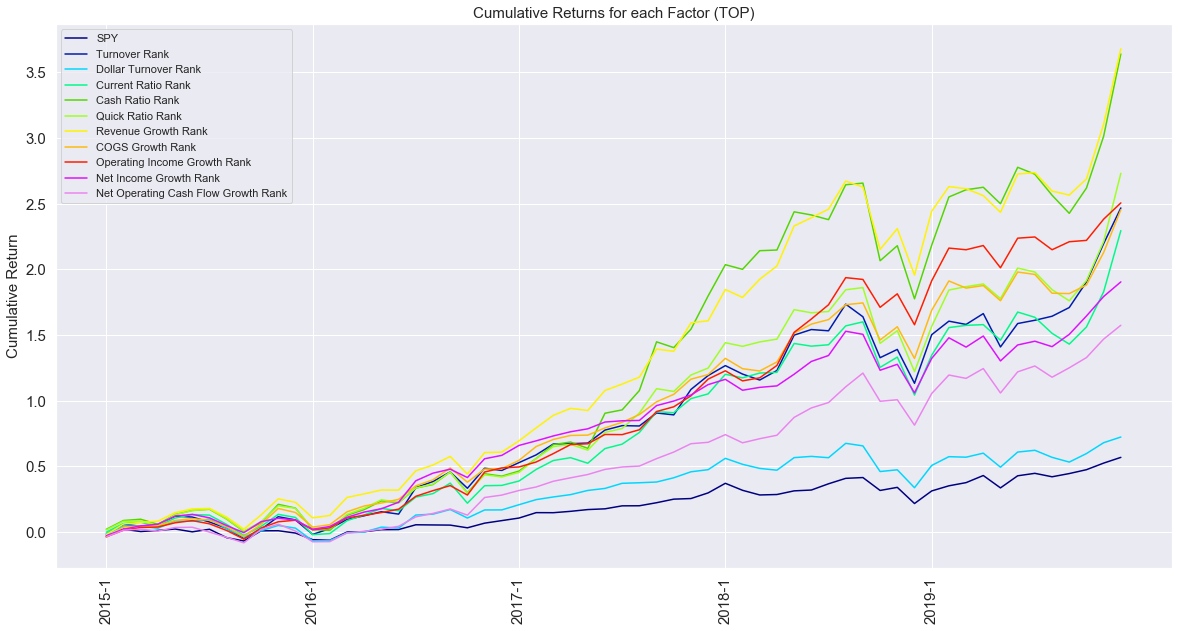

In [15]:
Object.Plot_Cum_TOP_Return(Factor_Rank)

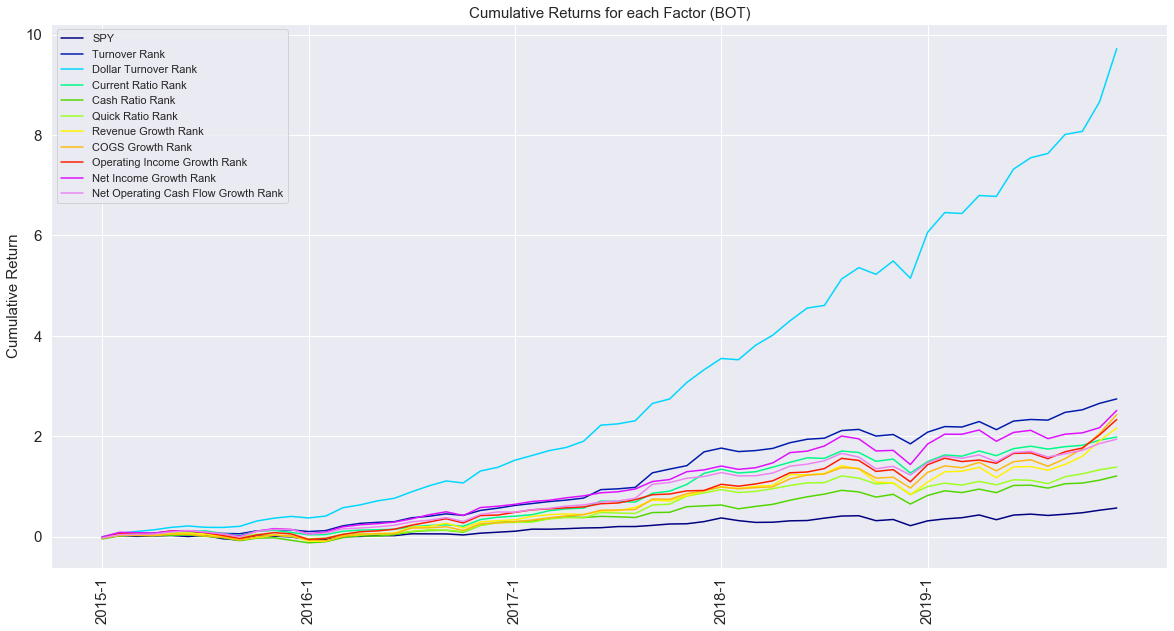

In [16]:
Object.Plot_Cum_BOT_Return(Factor_Rank)

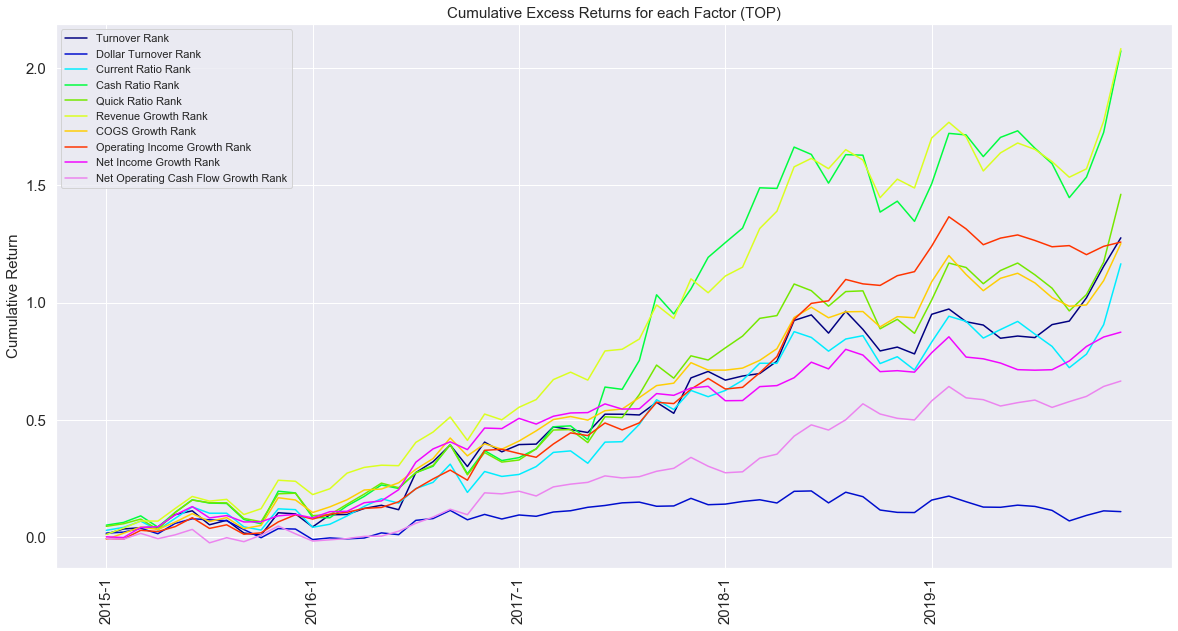

In [17]:
Object.Plot_Cum_TOP_Excess(Factor_Rank)

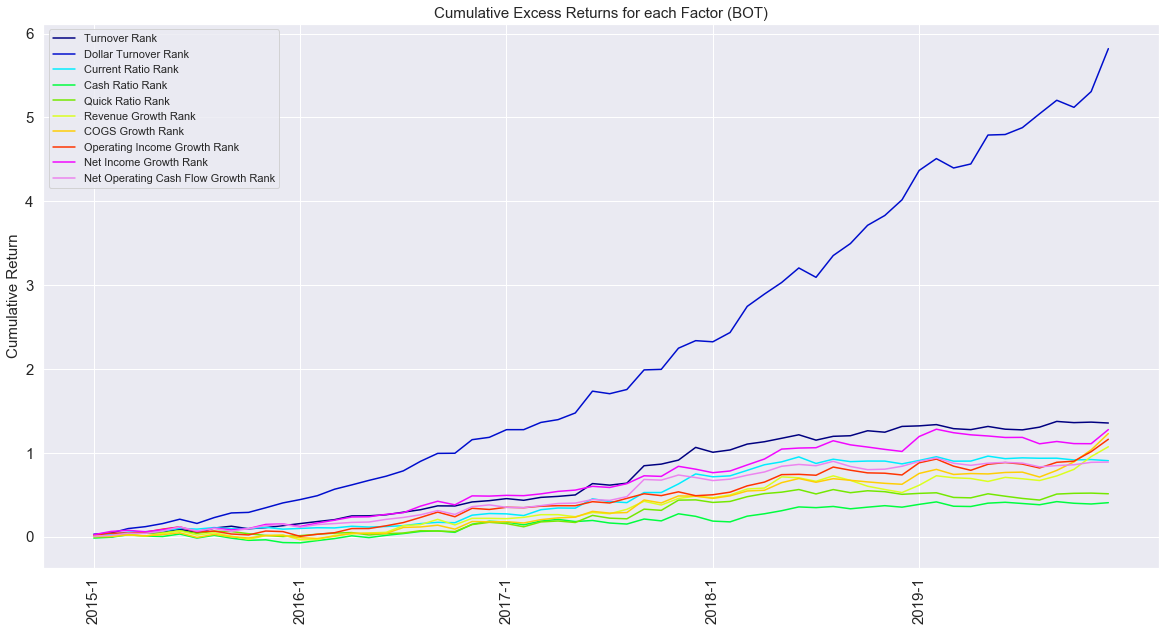

In [18]:
Object.Plot_Cum_BOT_Excess(Factor_Rank)

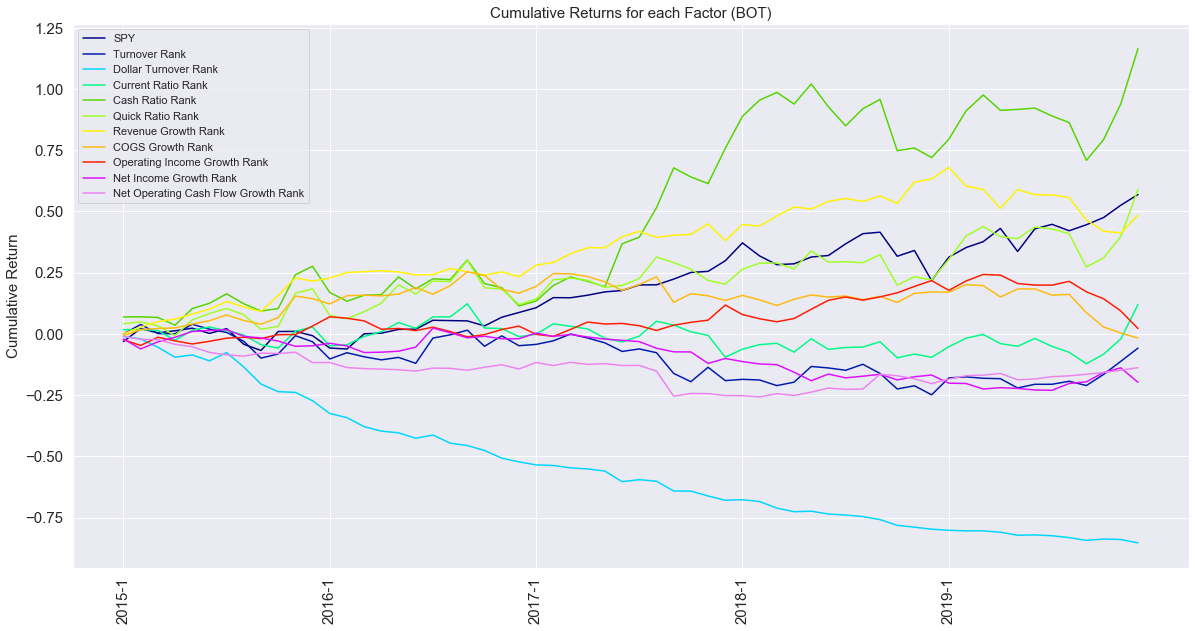

In [19]:
Object.Plot_Cum_Diff_Return(Factor_Rank)

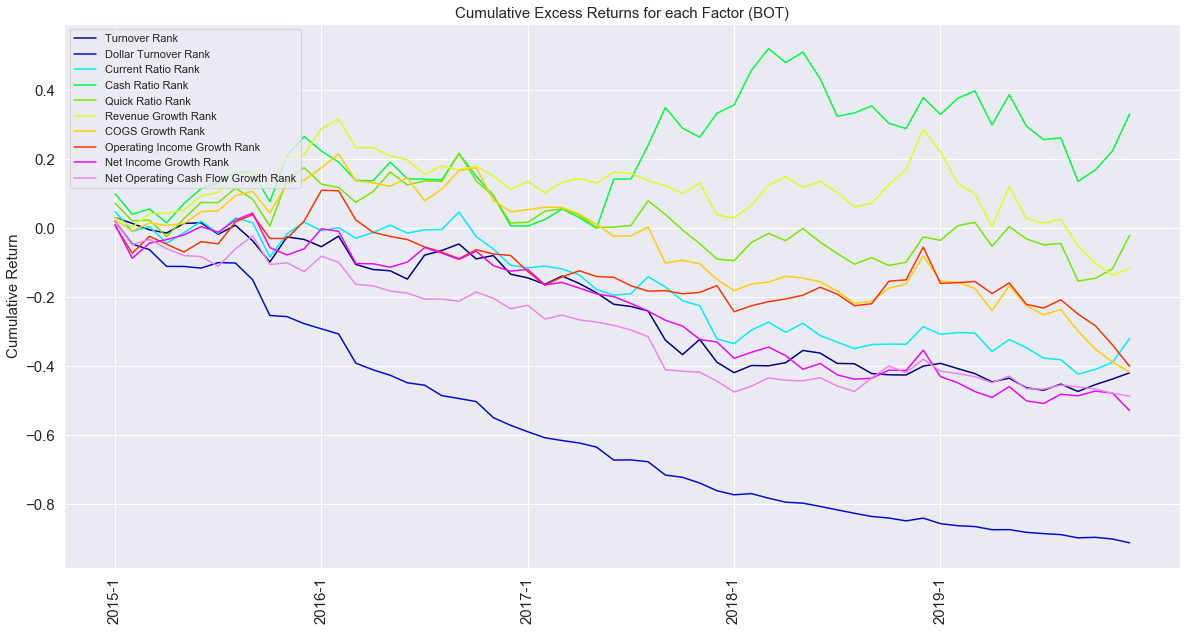

In [20]:
Object.Plot_Cum_Diff_Excess(Factor_Rank)

# Combine Factors

In [21]:
Combine_Rank = ['Liquidity Combine Rank', 'Growth Combine Rank', 'Total Rank']
Object2 = Solve(df, SPY, Date)

## Combine All these Factors into one

In [22]:
Object2.Combine_Factors()

## Calculate Return

In [23]:
Object2.Get_Returns(Combine_Rank)

## Give a Summary for Return and T Test for Excess Return

In [24]:
Object2.Show_DF_Return(Combine_Rank)

In [25]:
Object2.df_Return

,Factor,TOP%,BOT%,DIF%,t(TOP),t(BOT),t(DIF),Alpha TOP%,Alpha BOT%,Alpha DIF%,t(Alpha TOP),t(Alpha BOT),t(Alpha DIF),TOP std,BOT std,DIF std
0,Liquidity Combine,1.663833,2.309840,-0.646007,1.991664,4.673121,-1.100273,0.487575,1.441384,-0.953810,0.895686,4.550689,-1.810217,6.416817,3.796652,4.509855
1,Growth Combine,1.629761,1.290121,0.339640,2.679580,2.284844,1.174856,0.783210,0.341026,0.442184,2.368083,1.079183,1.540488,4.671788,4.337105,2.220547
2,Total,1.576914,1.776078,-0.199164,1.984048,3.602382,-0.376829,0.514553,0.902238,-0.387685,1.040729,3.083407,-0.822241,6.104946,3.787026,4.059677


In [26]:
Object2.Show_DF_Excess(Combine_Rank)

In [27]:
Object2.df_Excess

,Factor,TOP%,BOT%,DIF%,t(TOP),t(BOT),t(DIF),TOP std,BOT std,DIF std
0,Liquidity Combine,0.851000,1.497007,-1.458840,1.464106,4.433014,-2.600237,4.464605,2.593884,4.309439
1,Growth Combine,0.816927,0.477288,-0.473194,2.416761,1.500533,-0.955274,2.596425,2.443210,3.804844
2,Total,0.764081,0.963245,-1.011997,1.451463,3.179243,-1.926825,4.043517,2.327228,4.034253


## Plot Cumulative Return

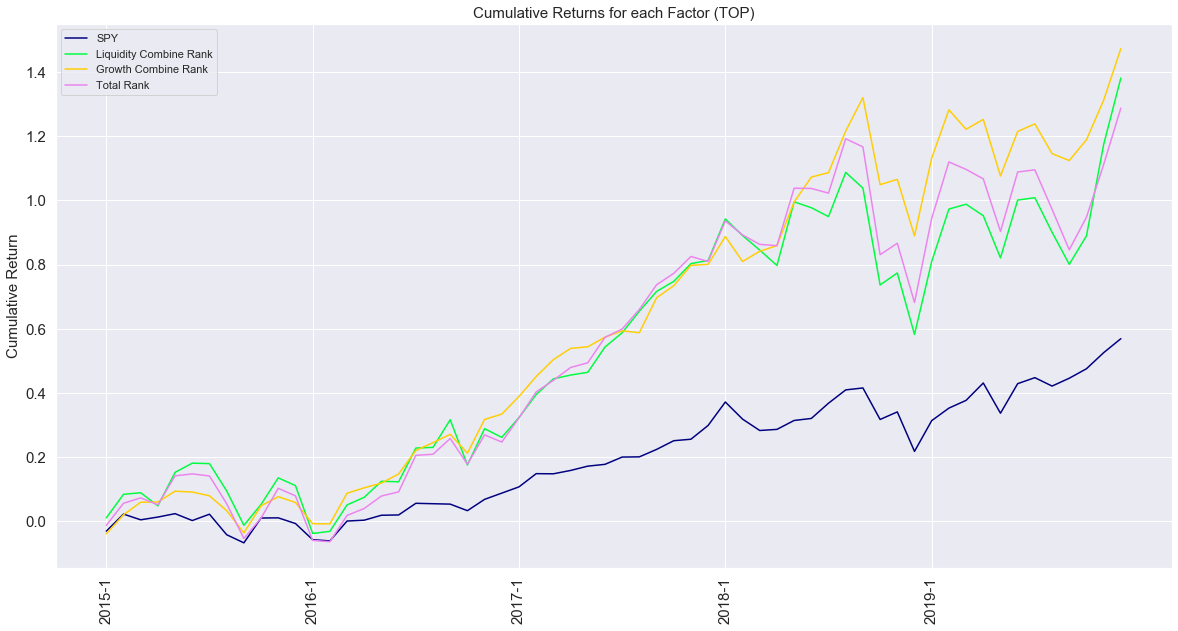

In [28]:
Object2.Plot_Cum_TOP_Return(Combine_Rank)

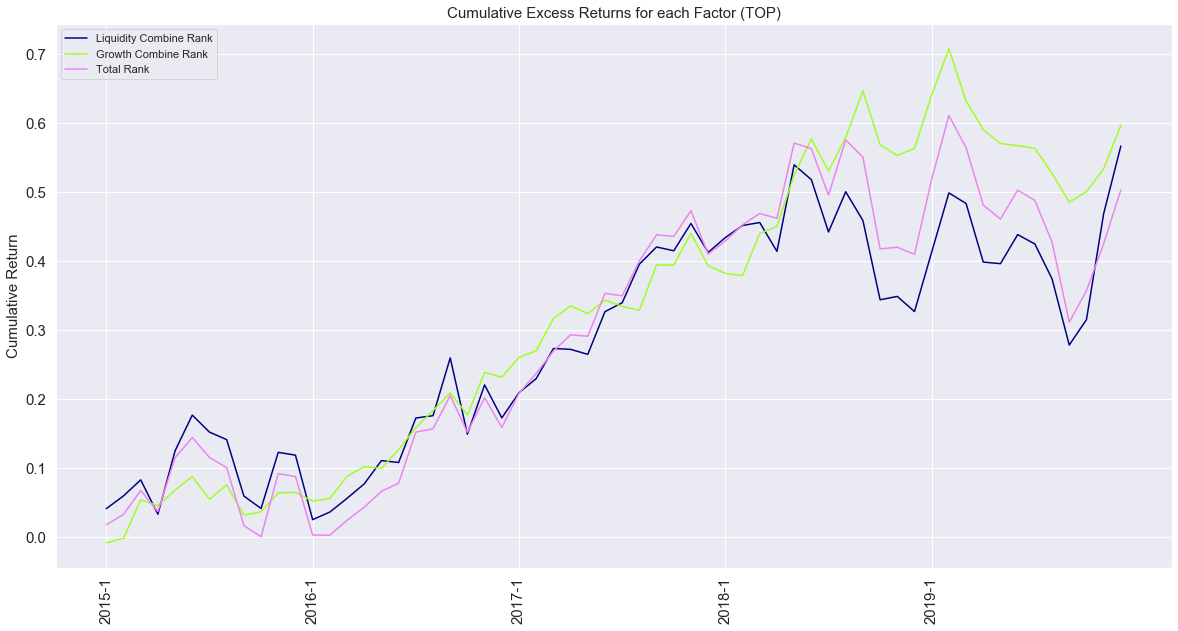

In [29]:
Object2.Plot_Cum_TOP_Excess(Combine_Rank)

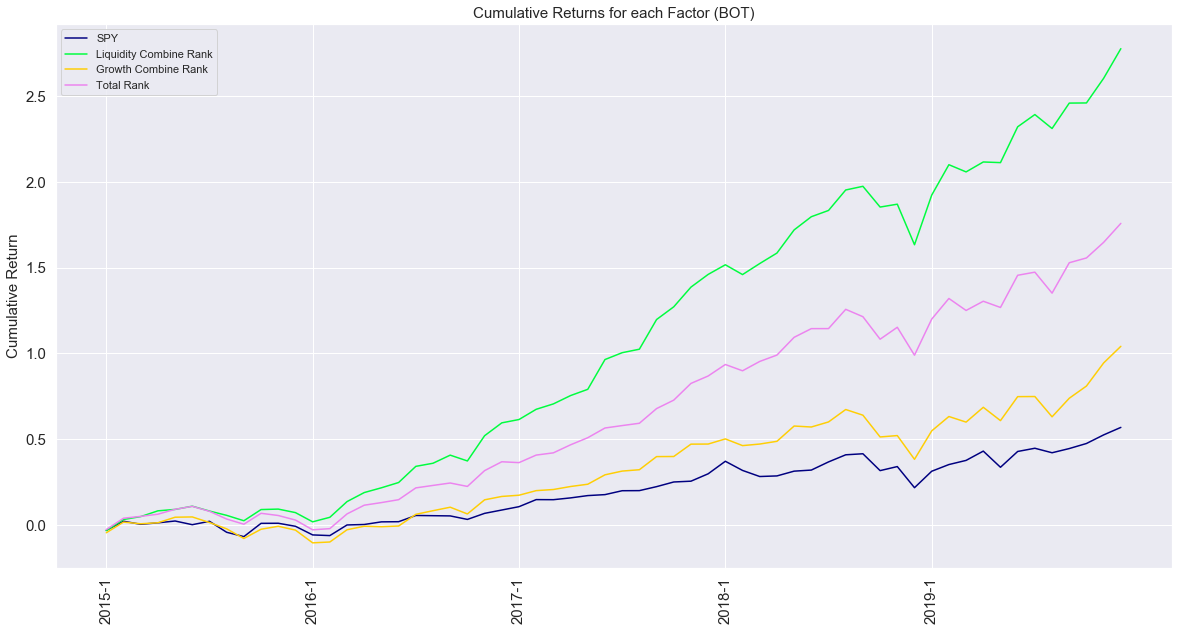

In [30]:
Object2.Plot_Cum_BOT_Return(Combine_Rank)

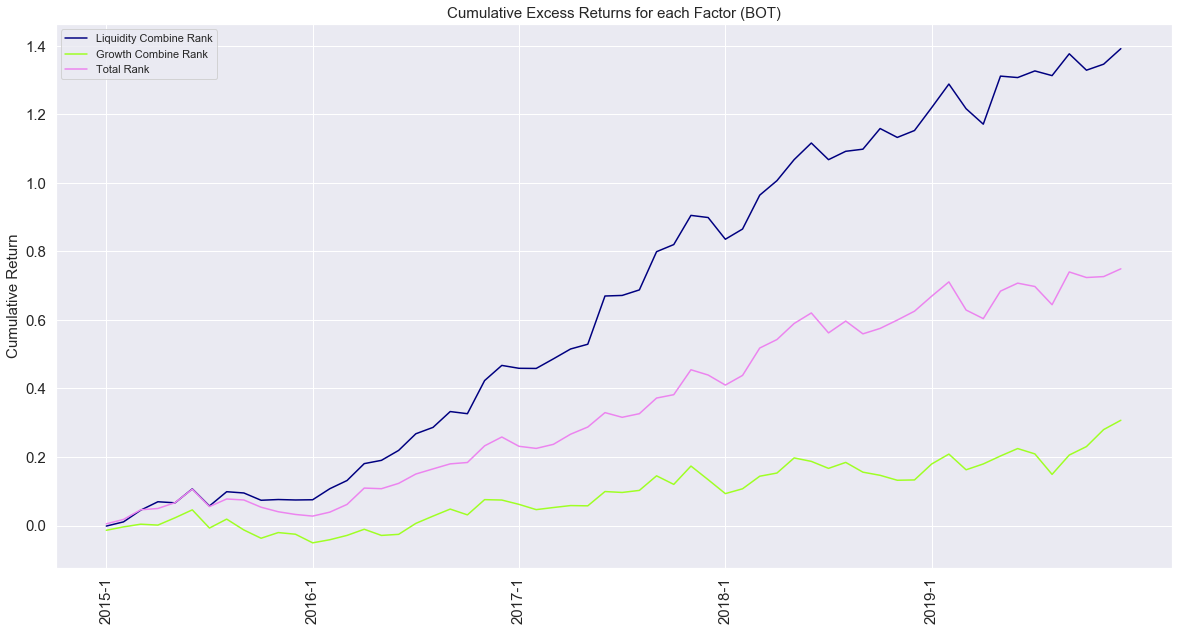

In [31]:
Object2.Plot_Cum_BOT_Excess(Combine_Rank)

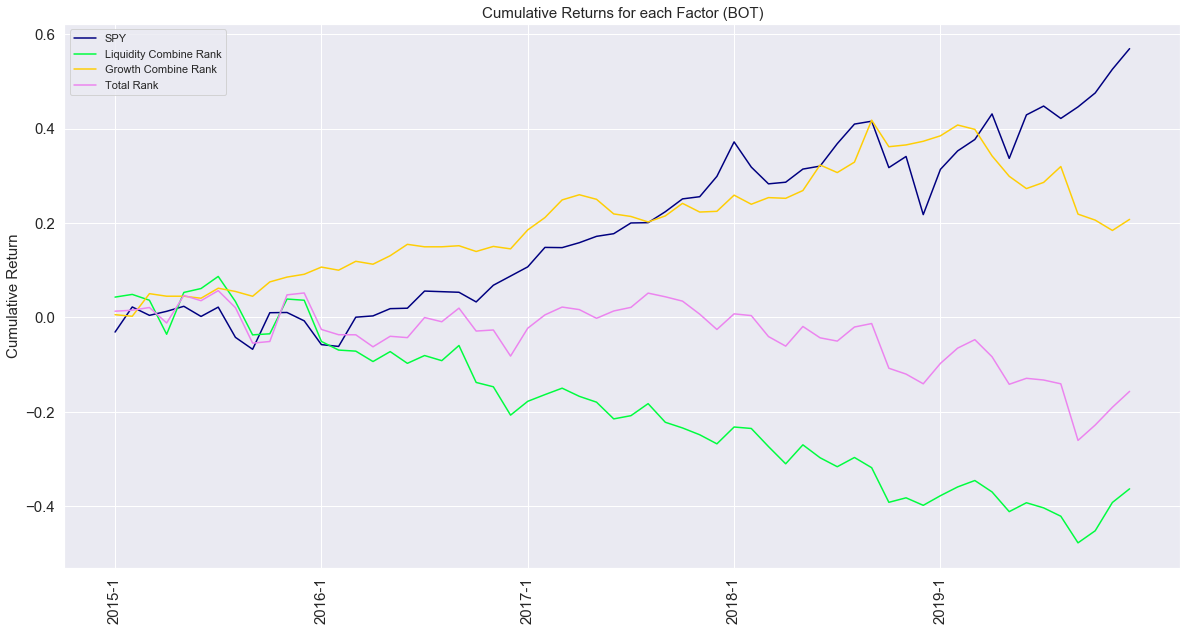

In [32]:
Object2.Plot_Cum_Diff_Return(Combine_Rank)

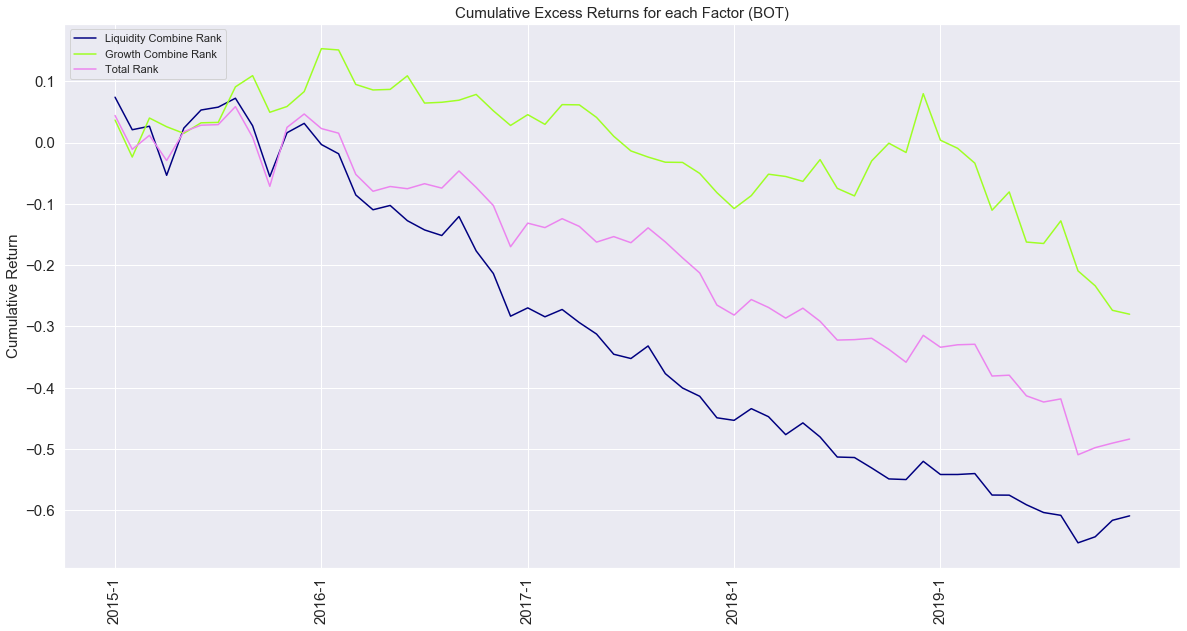

In [33]:
Object2.Plot_Cum_Diff_Excess(Combine_Rank)

In [34]:
Object.df_Return.to_csv("./Table/df_Return_test.csv")
Object.df_Excess.to_csv("./Table/df_Excess_test.csv")

Object2.df_Return.to_csv("./Table/df_Return2_test.csv")
Object2.df_Excess.to_csv("./Table/df_Excess2_test.csv")